# Data Augmentation using Keras

## Does ImageDataGenerator add more images to my dataset?


Short answer: 1) All the original images are just transformed (i.e. rotation, zooming, etc.) every epoch and then used for training, and 2) [Therefore] the number of images in each epoch is equal to the number of original images you have.

Long answer: In each epoch, the ImageDataGenerator applies a transformation on the images you have and use the transformed images for training. The set of transformations includes rotation, zooming, etc. By doing this you're somehow creating new data (i.e. also called data augmentation), but obviously the generated images are not totally different from the original ones. This way the learned model may be more robust and accurate as it is trained on different variations of the same image.

You need to set the steps_per_epoch argument of fit method to n_samples / batch_size, where n_samples is the total number of training data you have (i.e. 1000 in your case). This way in each epoch, each training sample is augmented only one time and therefore 1000 transformed images will be generated in each epoch.

Further, I think it's worth clarifying the meaning of "augmentation" in this context: basically we are augmenting the images when we use ImageDataGenerator and enabling its augmentation capabilities. But the word "augmentation" here does not mean, say, if we have 100 original training images we end up having 1000 images per epoch after augmentation (i.e. the number of training images does not increase per epoch). Instead, it means we use a different transformation of each image in each epoch; hence, if we train our model for, say, 5 epochs, we have used 5 different versions of each original image in training (or 100 * 5 = 500 different images in the whole training, instead of using just the 100 original images in the whole training). To put it differently, the total number of unique images increases in the whole training from start to finish, and not per epoch.

### Importing the Required Libraries

In [1]:
import os, cv2, random
import numpy as np
import pandas as pd
#displaying the image using matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  

#### Display a sample Image using Matplotlib

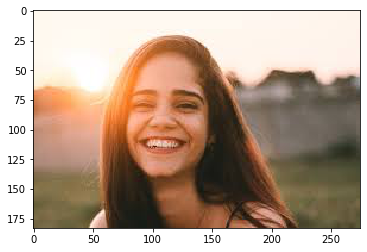

In [2]:

plt.imshow(mpimg.imread('opencv-1\\smile.jpg'))
plt.show()


#### augmentation using a single image 

In [3]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1,  
        height_shift_range=0.2,  
        horizontal_flip=True, 
        vertical_flip=False)  

In [4]:
img = load_img(r'augmentation\dogs\d4.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)

In [5]:
datagenerator=datagen.flow(x, batch_size=1,
                           save_prefix='dog', save_format='jpeg')

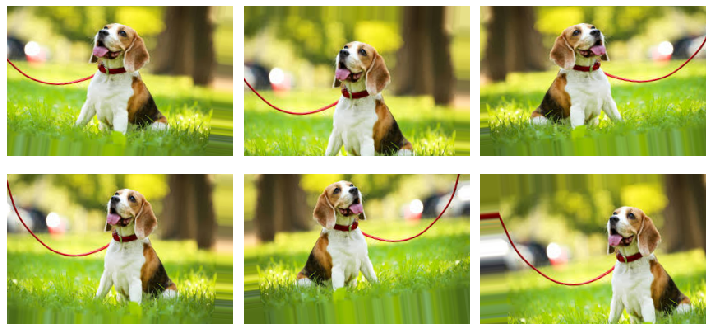

In [6]:
#code to display the augmented images
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    for x in datagenerator:
        plt.imshow((x[0]/255),cmap='gray')
        #lt.title('y={}'.format(y[0]))
        plt.axis('off')
        break
plt.tight_layout()
plt.show()


### Performing Data augmentation on a folder containing 3 subfolders

In [7]:
#To print number of subfolders in the given folder
test_dir=r'augmentation'
os.listdir(test_dir)

['cats', 'dogs', 'goat']

In [8]:
#given the directory,batch size,the below code produces augmented images 
batch_size=32

val_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        shuffle=True,
        batch_size=batch_size)



Found 35 images belonging to 3 classes.


In [9]:
len(val_generator)

2

output [0. 1. 0.]


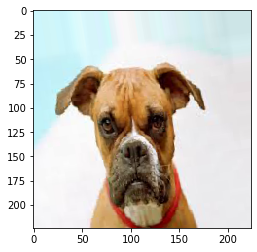

output [0. 1. 0.]


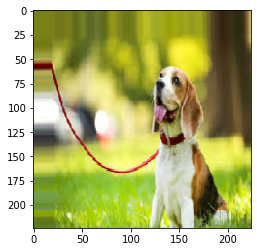

output [0. 0. 1.]


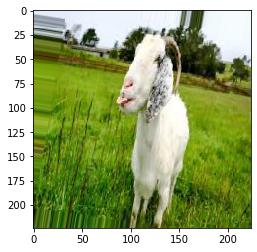

output [1. 0. 0.]


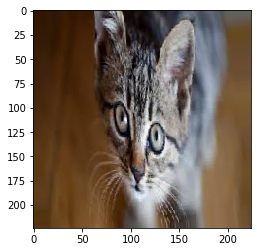

output [1. 0. 0.]


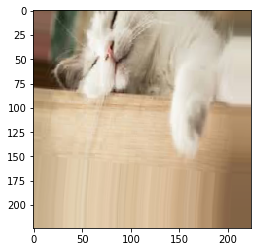

output [0. 1. 0.]


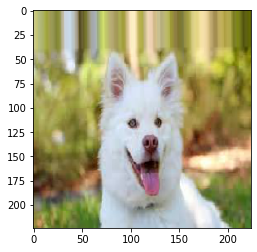

In [10]:
x,y = val_generator.next()

for i in range(0,6):
    image = x[i]/255
    image_label=y[i]
    print('output',image_label)
    plt.imshow(image)
    plt.show()

### Using the below code we will save the images to a target directory

In [11]:
#here the loop breaks when the image count reaches 20
img = load_img(r'augmentation\dogs\d7.jpg')   # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)
i = 0
storage='storage'
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=storage, save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

# How many images does Imagedatagenerator generate (in deep learning)?

 For example, if you have 1000 images in your dataset and the batch size is defined as 10. Then the "ImageDataGenerator" will produce 10 images in each iteration of the training.
 
 
If you do not mention steps_per_epoch in the training generator, the Imagedatagenerator generates different random augmented images for every batch in each epoch. For example, if you have 500 images and batches=50, in every epoch, the imagedatagenerator generates 10 different augmented image series. 

## If my dataset is imbalenced,  i have enough number of images for a certain classes and only few for some classes.


## can i perform data augmentation only on the classes having less images??

perform data augmentation for each minor class seperately and store them in there respective folders

In [12]:
train_generator = datagen.flow_from_directory(directory=test_dir, 
                                              class_mode='categorical',
                                              target_size=(224,224), 
                                              batch_size=16,
                                              save_to_dir=r'augmentation\cats',
                                              save_prefix='cat',
                                              shuffle=True, classes=["cats"])

Found 21 images belonging to 1 classes.


output [1.]


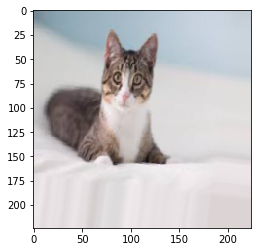

output [1.]


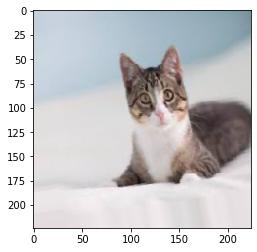

output [1.]


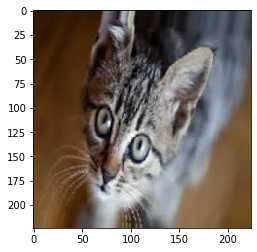

output [1.]


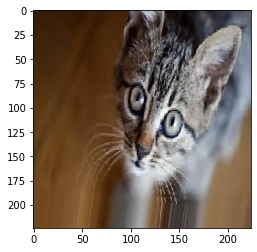

output [1.]


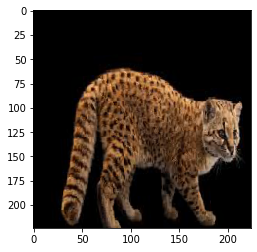

output [1.]


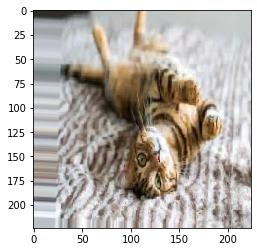

output [1.]


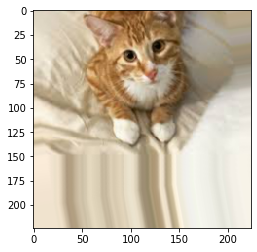

output [1.]


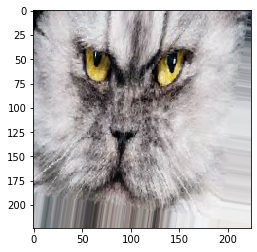

output [1.]


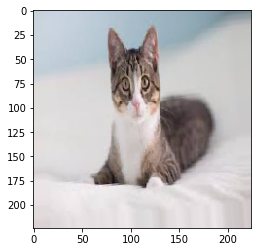

output [1.]


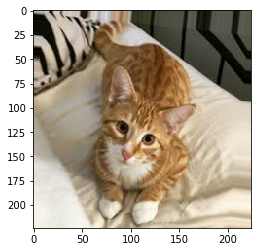

output [1.]


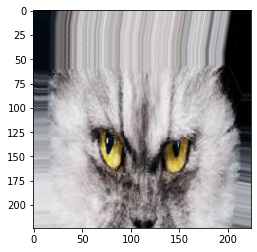

output [1.]


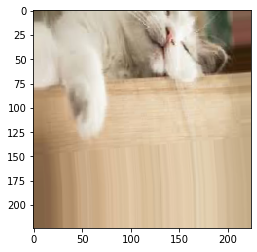

output [1.]


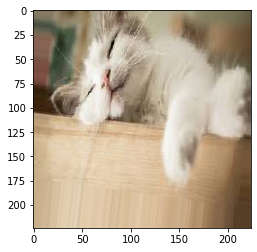

output [1.]


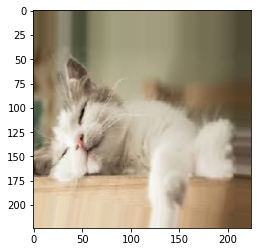

output [1.]


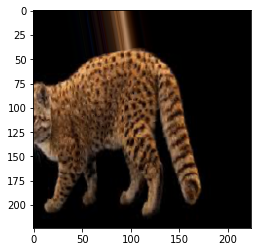

output [1.]


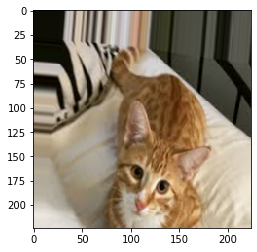

In [13]:
x,y = train_generator.next()

for i in range(0,16):
    image = x[i]/255
    image_label=y[i]
    print('output',image_label)
    plt.imshow(image)
    plt.show()

In [14]:
os.getcwd()

'C:\\Users\\shkatta'